In [1]:
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz

In [2]:
#!python -m textblob.download_corpora

In [17]:
# check version
from pycaret.utils import version
import pandas as pd
pd.set_option('display.max_colwidth', -1)
version()

'2.1.2'

In [18]:
from pycaret.datasets import get_data
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looking to receive a small loan. Each of them has taken out a very small loan already, so this would be their second. With this loan the group is going to try and expand their small businesses and start generating more income. <P>\r\n\r\nEduviges is the group representative and leader of the group. Eduviges has a lot on the line because she has 6 children that she has to take care of. She told me that those children are the reason she wants to be successful. She wants to be able to provide a different life for them and show them that they can be successful as well. <P>\r\n\r\nEduviges has a very small business selling shoes and Avon products. She plans to expand using this loan and dreams of success. The whole group is ready for this new challenge and are on the road to bettering their lives. On behalf of Eduviges, the group, and Esperanza International--------- Thank you for your support!!!!",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward"" is a group of ten entrepreneurs seeking their second loan from Esperanza International. The groups past loan has been successfully repaid and the group hopes to use additional loan funds for further business expansion. \r\n\r\nEstella is one of the coordinators for this group in Santiago. Estella sells undergarments to her community and neighboring communities. Estella used her first loan, which has now been completely repaid, to buy additional products and Estela was able to increase the return on her business by adding inventory. Estella wants to use her second loan to buy more undergarments to sell to her customers. \r\n\r\nEstella lives with her mother and sister and dreams of improving the house they live in and plans to use her business profits to do so. Other members of Estellas microfinance bank run similar entrepreneurial activities including arts, juice, ice-cream, fried food, and cake sales. \r\n\r\nOn behalf of Esperanza and this group of business entrepreneurs, we would like to thank you for your support!",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 people hoping to start their own businesses. This group is looking to receive loans to either start a small business or to try and increase their business. Everyone in this group is living in extreme poverty, and they see this as a chance to improve their lives and the lives of their families. \r\n\r\n""Dalina"" is the group representative and was chosen because she is a very hardworking women. She is a young mother of two children, and she realized that she wanted a better life for her and her family. She is hoping to start a small business of selling clothes to people in her barrio. She hopes to someday have a thriving business and be able to provide for her family. On behalf of Dalina, the rest of the group, and Esperanza International: Thank you for you support!!!",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10 women who are looking to receive their first loans. This is a very young group of women, and they all want to start changing their lives right away. Riquena is the group representative and leader of this group, and she is only 18 years old. She is also married, but has no children. She told me that once she has kids she wants to be able to provide them with a good life, and that is the main reason she is trying to start her own business. She plans on selling used clothes in her area, and hopes to one day have a big clothing store, and also design clothes. She is a very motivated person, and you can see it when you speak with her. She speaks Spanish and Creole fluently, and is studying English. This whole group is ready for this next step, and excited about the opportunity. On behalf of Riquena, the group, and Esperanza International----- Thank you for your 

In [5]:
from pycaret.nlp import *
nlp1 = setup(data, target = 'en', session_id=123, log_experiment=True, log_plots = True, experiment_name='kiva1')

Description,Value
session_id,123
Documents,6818
Vocab Size,10663
Custom Stopwords,False


In [6]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


In [7]:
lda = create_model('lda')

In [8]:
nmf = create_model('nmf', num_topics = 6)

In [23]:
lda.show_topics()

[(0,
  '0.043*"business" + 0.028*"year" + 0.023*"loan" + 0.021*"child" + 0.020*"school" + 0.018*"family" + 0.018*"sell" + 0.017*"stock" + 0.017*"old" + 0.015*"buy"'),
 (1,
  '0.023*"rice" + 0.012*"also" + 0.011*"farmer" + 0.010*"loan" + 0.008*"sector" + 0.007*"use" + 0.006*"small" + 0.006*"mathenge" + 0.005*"many" + 0.004*"people"'),
 (2,
  '0.041*"loan" + 0.032*"group" + 0.027*"child" + 0.021*"school" + 0.020*"buy" + 0.017*"member" + 0.016*"fee" + 0.016*"usd" + 0.015*"woman" + 0.015*"income"'),
 (3,
  '0.033*"business" + 0.026*"loan" + 0.022*"able" + 0.017*"make" + 0.016*"child" + 0.015*"work" + 0.014*"start" + 0.014*"first" + 0.013*"sell" + 0.010*"help"')]

In [19]:
lda_results = assign_model(lda)
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Dominican Republic,group woman look receive small loan take small loan already would second loan group go try expand small business start generate income eduvige leader group eduvige lot line child tell child reason want successful want able provide different life show successful well eduvige small business selling shoe product plan expand use loan dream success whole group ready new challenge road bettering live behalf eduvige group support,F,1225,partner,Retail,0,0.262687,0.000423,0.154408,0.582483,Topic 3,0.58
1,Dominican Republic,walk forward group entrepreneur seek second loan esperanza_international group loan group hope use additional loan fund business expansion coordinator group sell undergarment community neighboring community use first loan completely repay buy additional product estela able increase return business add inventory want use second loan buy undergarment sell customer live mother sister dream improve house live plan use business profit member estella microfinance entrepreneurial_activities_include art juice fried food cake sale group business entrepreneur would like thank support,F,1975,lender,Clothing,0,0.474940,0.000365,0.124632,0.400063,Topic 0,0.47
2,Dominican Republic,group people hope start business group look receive loan start small business try increase business group see chance improve life live choose hardworke woman young mother child realize want well life family hope start small business sell clothe people barrio hope someday thrive business able provide family behalf support,F,2175,partner,Clothing,0,0.193054,0.000538,0.091899,0.714509,Topic 3,0.71
3,Dominican Republic,live group woman look receive first loan young group woman want start change life right away leader group year old also married child tell kid want able provide good life main reason try start business plan sell use clothe area hope day big clothing store also design clothe motivate person see speak speak spanish fluently study english whole group ready next step excited_opportunity behalf support,F,1425,partner,Clothing,0,0.193776,0.000420,0.143016,0.662789,Topic 3,0.66
4,Dominican Republic,vive large group people hope take loan many second loan loan hope use increase business business range clothing sale salon choose group representative hard work dedication miline hardworke mother young child old year old take first loan start small business sell chicken type food next loan feel increase business greatly start make money support family dream store someday able provide family comfortable life behalf support,F,4025,partner,Food,0,0.240755,0.000417,0.065576,0.693252,Topic 3,0.69


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



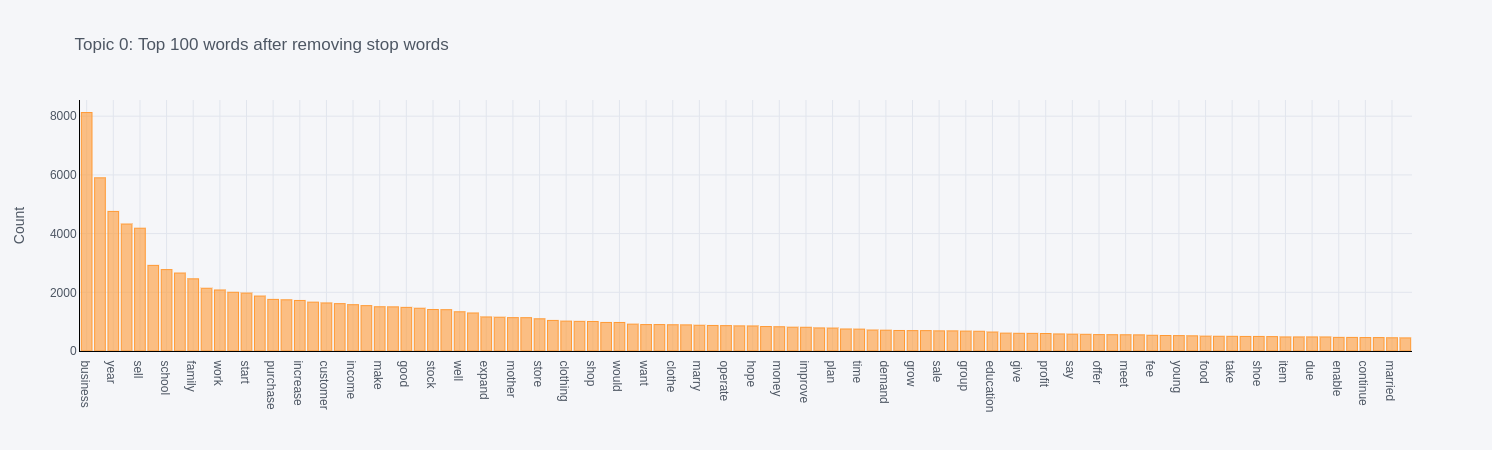

In [26]:
plot_model(lda)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



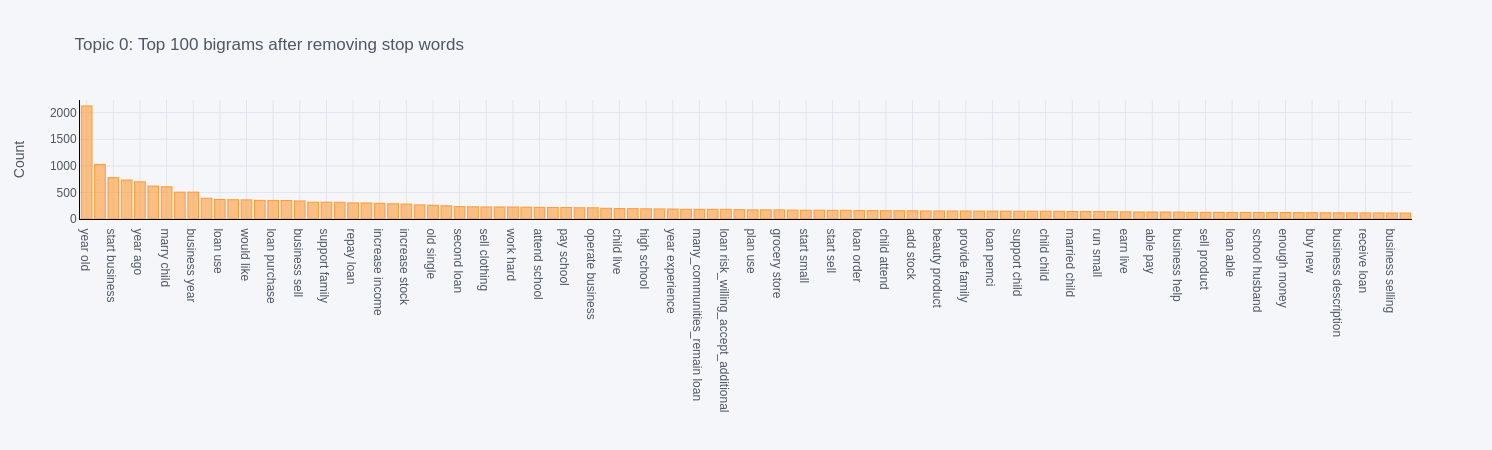

In [11]:
plot_model(lda, plot = 'bigram')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



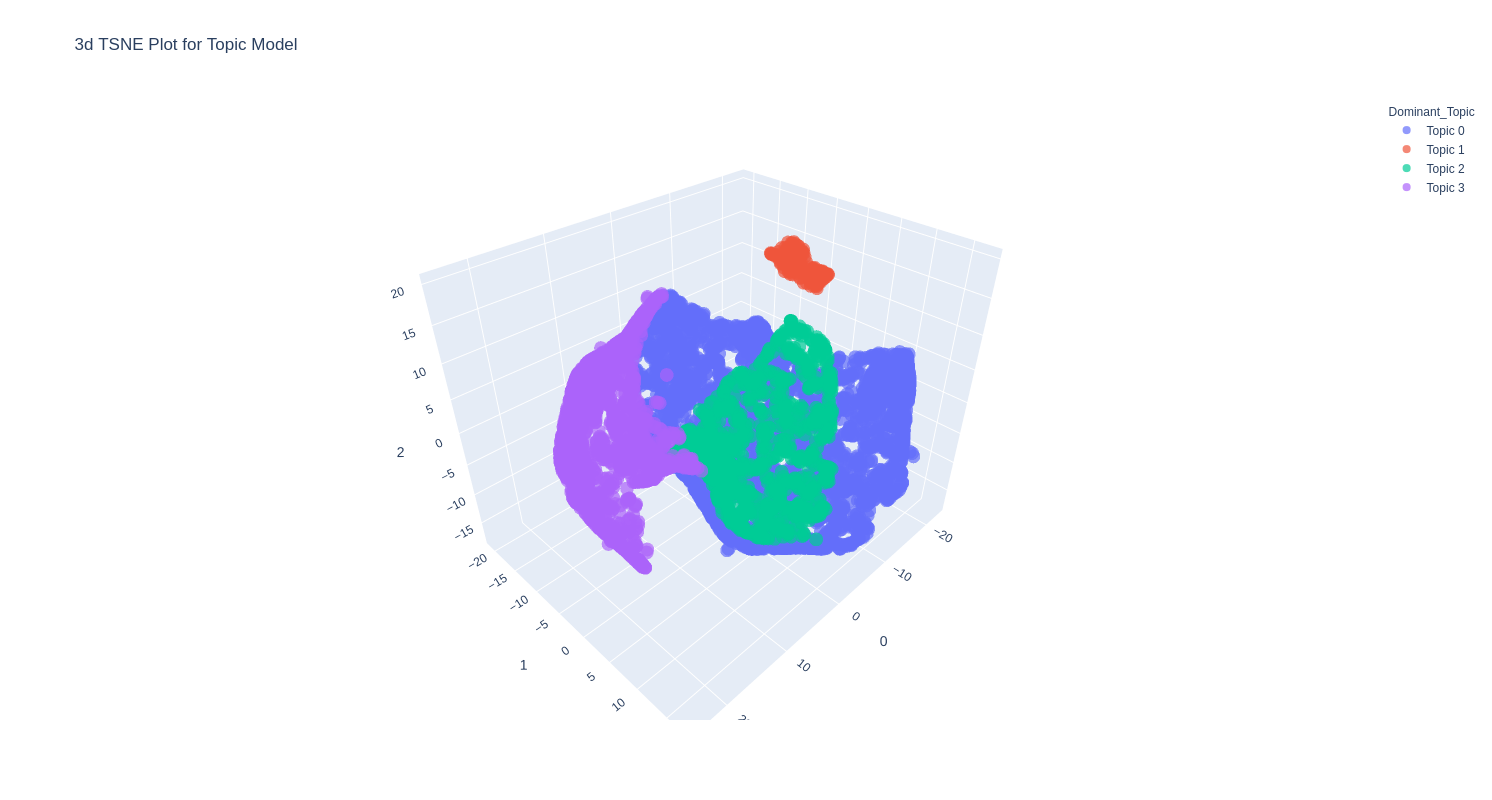

In [12]:
plot_model(lda, plot = 'tsne')

In [15]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [14]:
!mlflow ui

[2020-10-24 21:07:51 -0300] [26874] [INFO] Starting gunicorn 20.0.4
[2020-10-24 21:07:51 -0300] [26874] [INFO] Listening at: http://127.0.0.1:5000 (26874)
[2020-10-24 21:07:51 -0300] [26874] [INFO] Using worker: sync
[2020-10-24 21:07:51 -0300] [26877] [INFO] Booting worker with pid: 26877
^C
[2020-10-24 21:11:50 -0300] [26874] [INFO] Handling signal: int
[2020-10-24 21:11:50 -0300] [26877] [INFO] Worker exiting (pid: 26877)
